# Исследование надежности заемщиков


## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.lines as lines
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv('/datasets/data.csv')


null_data = data.copy()

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [42]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category,sub_category,rate
7866,5,773.12,36,среднее,1,женат / замужем,0,F,сотрудник,0,48772,операции с жильем,D,операции с недвижимостью,1,94.79
15916,5,2286.26,37,среднее,1,женат / замужем,0,F,сотрудник,0,256698,покупка недвижимости,B,операции с недвижимостью,87,94.53
21156,5,1690.02,59,среднее,1,женат / замужем,0,M,сотрудник,0,269068,операции со своей недвижимостью,B,операции с недвижимостью,89,94.53
20837,5,2386.60,35,среднее,1,женат / замужем,0,F,компаньон,0,204241,жилье,B,операции с недвижимостью,77,94.53
4397,5,3248.84,36,среднее,1,женат / замужем,0,F,компаньон,0,168460,операции с недвижимостью,C,операции с недвижимостью,63,94.17
20452,5,268.43,38,начальное,3,женат / замужем,0,F,сотрудник,0,212545,заняться высшим образованием,B,получение образования,79,94.03
15822,5,418.20,31,среднее,1,женат / замужем,0,F,сотрудник,0,77552,сделка с подержанным автомобилем,C,операции с автомобилем,9,93.65
16211,5,387.32,35,среднее,1,гражданский брак,1,F,госслужащий,0,126102,на проведение свадьбы,C,проведение свадьбы,36,93.57
3979,5,1572.33,42,среднее,1,гражданский брак,1,M,сотрудник,0,142594,на покупку своего автомобиля,C,операции с автомобилем,46,93.21
4727,0,334348.87,61,среднее,1,вдовец / вдова,2,F,пенсионер,0,47823,операции с жильем,D,операции с недвижимостью,1,93.14


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [14]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [15]:
data.duplicated().sum()

71

In [16]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [45]:
print(*data['purpose'].unique(), sep=', ')

операции с жильем, покупка недвижимости, операции со своей недвижимостью, жилье, операции с недвижимостью, заняться высшим образованием, сделка с подержанным автомобилем, на проведение свадьбы, на покупку своего автомобиля, покупка жилой недвижимости, покупка коммерческой недвижимости, строительство собственной недвижимости, строительство недвижимости, ремонт жилью, покупка жилья для сдачи, покупка жилья, операции с коммерческой недвижимостью, строительство жилой недвижимости, покупка жилья для семьи, покупка своего жилья, недвижимость, образование, профильное образование, приобретение автомобиля, на покупку подержанного автомобиля, на покупку автомобиля, автомобиль, получение дополнительного образования, получение образования, дополнительное образование, свой автомобиль, высшее образование, заняться образованием, получение высшего образования, сделка с автомобилем, автомобили, свадьба, сыграть свадьбу


**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

Так как вопросы заданий однотипен, имеет смысл составить функцию, возвращающую удобный для анализа датафрейм:


In [22]:
def debtors_share(col):
    data_debt = pd.pivot_table(data, values=['debt'], index=col)
    data_debt['debt'] = data_debt['debt'] * 100
    data_debt.insert(0, col, data_debt.index)
    data_debt.insert(1, 'all_debtors', data[col].value_counts())
    data_debt.insert(2, 'in_debt', data.groupby(col)['debt'].sum())
    data_debt = data_debt.reset_index(drop=True)
    return(data_debt)

Применим функцию для столбца 'children':

In [46]:
debt_children = debtors_share('children')

(debt_children
.style
.format({'debt': '{:.2f}%'})
.hide_index()
)

children,all_debtors,in_debt,debt
0,14091,1063,7.54%
1,4808,444,9.23%
2,2052,194,9.45%
3,330,27,8.18%
4,41,4,9.76%
5,9,0,0.00%


Можно заметить, что заёмщиков с 5 детьми доволно мало, и все они выплатили кредит в срок. Чтобы показать, что эта категория статистически не значима, посчитаем разницу средних арифметических взвешенных и построим диаграмму размах:

In [47]:
weighted_average = np.average(
    a=debt_children['debt'], weights=debt_children['all_debtors'])
weighted_average_new = np.average(
    a=debt_children['debt'].drop(index = 5),
    weights=debt_children['all_debtors'].drop(index = 5))

weights_ratio = weighted_average_new / weighted_average - 1
print('Разница между значениями составляет: {:.4f}%'.format(weights_ratio))

Разница между значениями составляет: 0.0004%


Удалим последнюю строку датафрейма:

In [26]:
debt_children = debt_children.drop(index = 5)

Теперь построим точечный график:

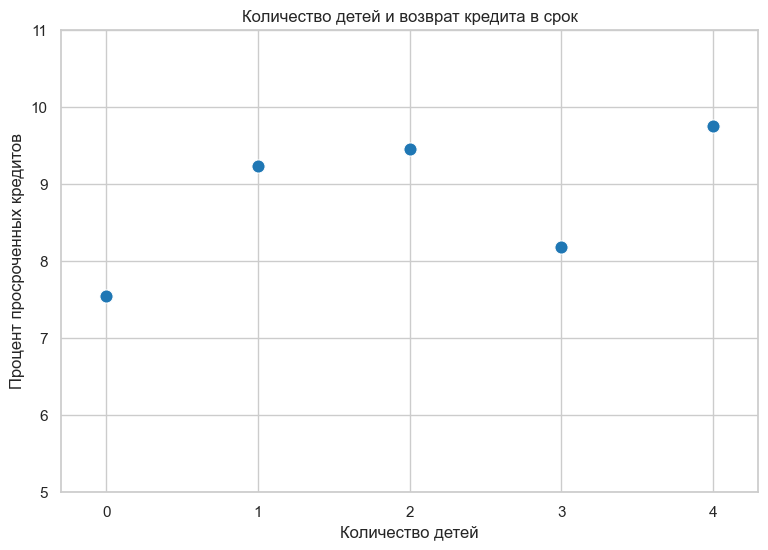

In [62]:
sns.set_context("notebook")
plt.figure(figsize=(9, 6))
sns.scatterplot(data=debt_children, x="children", y="debt", s=90)
plt.gca().set(xlim=(-0.3, 4.3), ylim=(5, 11),
              xlabel='Количество детей', 
              ylabel='Процент просроченных кредитов')

plt.title('Количество детей и возврат кредита в срок')
plt.show() 

**Вывод:** Из графика можно заметить, что процент невыплаченных в срок кредитов очень слабо увеличивается с повышением количества детей у заемщика, следовательно, зависимость есть. Только в случае с тремя детьми процент меньше, чем у соседних значений, но все еще больше, чем у заемщиков без детей. Возможно, играет роль внешний фактор- например, субсидирование многодетных детей государством. Возможно, стоит запросить дополнительную информацию и провести дополнительный анализ.

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

Применим функцию для столбца 'children':

In [28]:
debt_family = debtors_share('family_status')
(debt_family
.style
.format({'debt': '{:.2f}%'})
.hide_index()
)

family_status,all_debtors,in_debt,debt
Не женат / не замужем,2796,273,9.76%
в разводе,1189,84,7.06%
вдовец / вдова,951,63,6.62%
гражданский брак,4134,385,9.31%
женат / замужем,12261,927,7.56%


Узнаем среднее значение доли невыплаченных кредитов:

In [29]:
mean_family = debt_family['debt'].mean()
print('Среднее значение составляет: {:.2f}%'
      .format(mean_family))

Среднее значение составляет: 8.07%


Для наглядности, построим гистограмму:

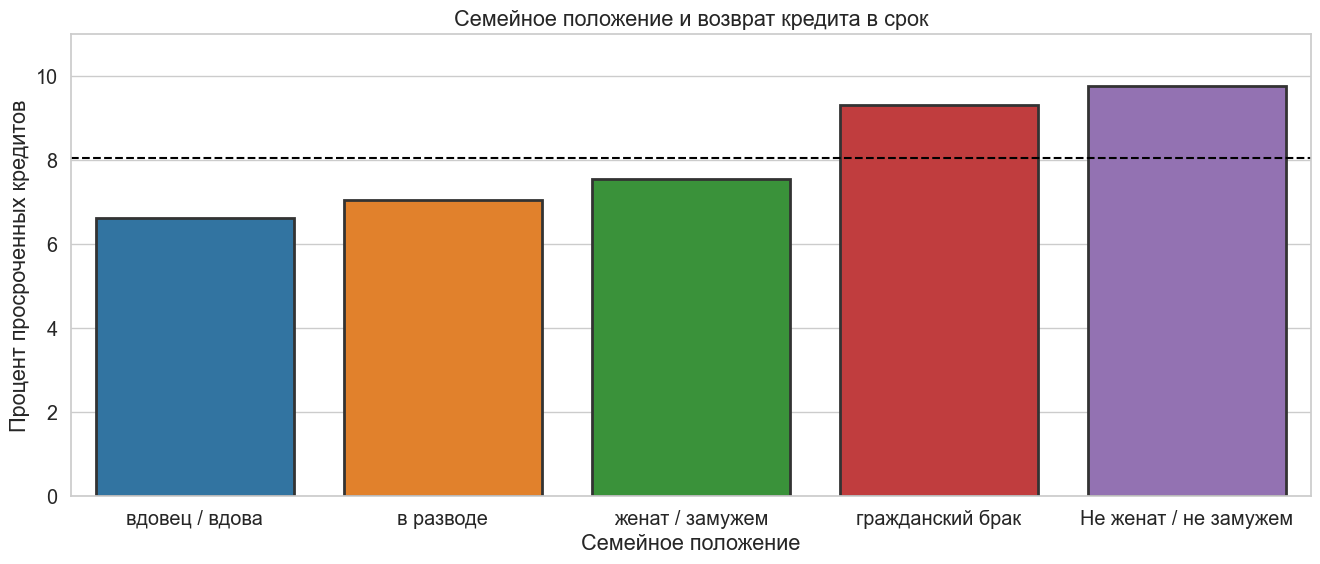

In [61]:
sns.set_context("notebook", font_scale=1.3)

plt.figure(figsize=(16, 6))

sns.barplot(data=debt_family, x= 'family_status', y = 'debt',
            linewidth=2, edgecolor=".2",
            order=debt_family.sort_values('debt')['family_status']).axhline(
            mean_family, ls = '--', color='0')

plt.gca().set(ylim=(0, 11),
              xlabel='Cемейное положение', 
              ylabel='Процент просроченных кредитов')

plt.title('Семейное положение и возврат кредита в срок')
plt.show()

**Вывод:** Как видно из гистограммы, неженатые (незамужние) заемщики и заемщики в гражданском браке имеют просрочку по кредиту  чаще, чем остальные категории (хотя заемщики в браки и отличаются от среднего значения всего на 51 пункт). Заемщики в разводе и вдовцы (вдовы) отличаются уже больше, чем в 1% от среднего значения. Зависимость от категории присутствует.

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

Применим функцию для столбца 'total_income_category':

In [52]:
debt_income = debtors_share('total_income_category')
pd.set_option('display.max_colwidth', 1)
(debt_income
.style
.format({'debt': '{:.2f}%'})
.hide_index()
)

total_income_category,all_debtors,in_debt,debt
A,25,2,8.00%
B,5014,354,7.06%
C,15921,1353,8.50%
D,349,21,6.02%
E,22,2,9.09%


Узнаем среднее значение доли невыплаченных кредитов:

In [32]:
mean_income = debt_income['debt'].mean()
print('Среднее значение составляет: {:.2f}%'.format(mean_income))

Среднее значение составляет: 7.73%


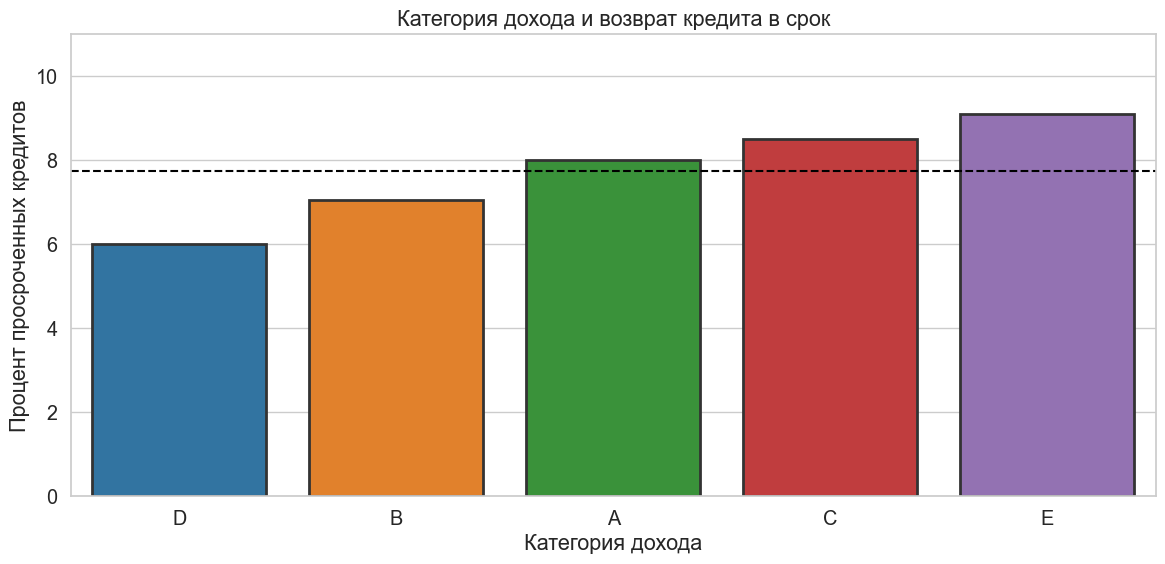

In [60]:
sns.set_context("notebook", font_scale=1.3)

plt.figure(figsize=(14, 6))

sns.barplot(data=debt_income, x='total_income_category', y="debt",
            linewidth=2, edgecolor=".2",
            order=debt_income.sort_values('debt')['total_income_category']).axhline(
            mean_income, ls = '--', color='0')

plt.gca().set(ylim=(0, 11),
              xlabel='Категория дохода', 
              ylabel='Процент просроченных кредитов')

plt.title('Категория дохода и возврат кредита в срок')
plt.show()

Как видно из гистограммы, категории A, C и E не выплачивают кредит чаще среднего, тогда как категории D и B выплачивают кредит без задержек чаще (причем заемщики из категории D отличаются от среднего значения почти на 2%)

Диапазоны являются категориальной величиной, как и факт просрочки по кредиту. Проверим зависимость между доходом как таковым и процентом просроченных кредитов. Для этого разобьем доход на субкатегории, близкие по значениям дохода, и проверим связь на графике:

In [54]:
data['sub_category'] = pd.qcut(data['total_income']\
                               .rank(method='first'), 100, labels=False)
debt_sub = debtors_share('sub_category')

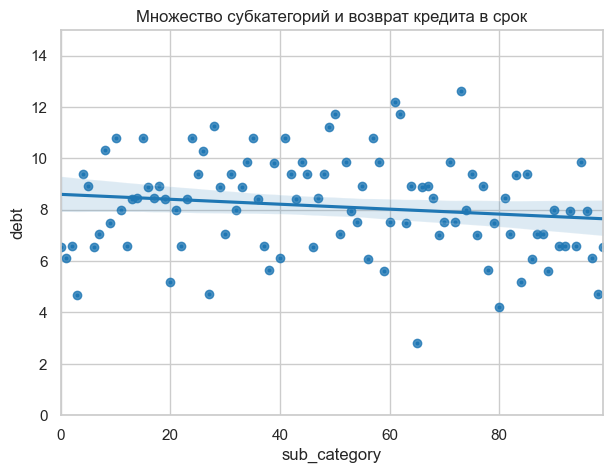

In [59]:
sns.set_context("notebook")

plt.figure(figsize=(7, 5))

sns.scatterplot(data=debt_sub, x="sub_category", y="debt", s=10)


plt.gca().set(xlim=(0, 99), ylim=(0, 15),
              xlabel='Количество детей', 
              ylabel='Процент просроченных кредитов')
sns.regplot(x=debt_sub['sub_category'], 
            y=debt_sub["debt"], fit_reg=True, order=1)

plt.title('Множество субкатегорий и возврат кредита в срок')
plt.show()

Из точечного графика видно, что субкатегории и процент просроченных кредитов независимы.

**Вывод:** Между самим доходом и возратом кредита в срок связи нет. Проанализировав ранее установленные категории дохода, было выяснено, от установленных категорий зависимость есть, и что категории D и B возвращают кредит чаще среднего.

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

Применим функцию для столбца 'purpose_category':

In [36]:
debt_purpose = debtors_share('purpose_category')
(debt_purpose
.style
.format({'debt': '{:.2f}%'})
.hide_index()
)

purpose_category,all_debtors,in_debt,debt
операции с автомобилем,4279,400,9.35%
операции с недвижимостью,10751,780,7.26%
получение образования,3988,369,9.25%
проведение свадьбы,2313,183,7.91%


In [37]:
mean_purpose = debt_purpose['debt'].mean()
print('Среднее значение составляет: {:.2f}%'
      .format(mean_purpose))

Среднее значение составляет: 8.44%


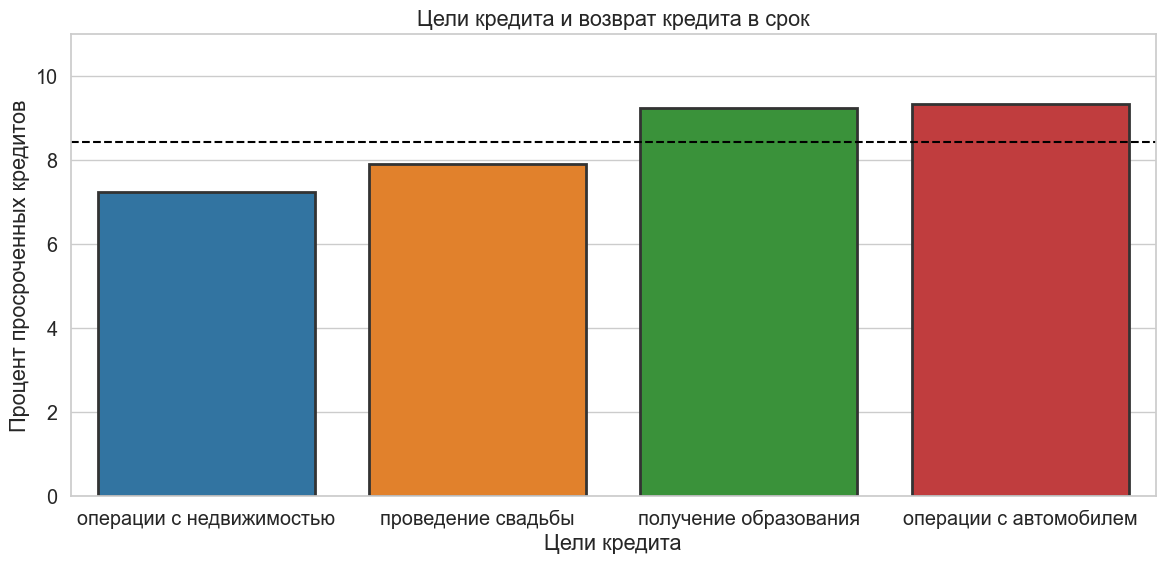

In [58]:
sns.set_context("notebook", font_scale=1.3)
plt.figure(figsize=(14, 6))

sns.barplot(data=debt_purpose, x='purpose_category', y="debt",
            linewidth=2, edgecolor=".2",
            order=debt_purpose.sort_values('debt')['purpose_category']).axhline(
            mean_purpose, ls = '--', color='0')

plt.gca().set(ylim=(0, 11),
              xlabel='Цели кредита', 
              ylabel='Процент просроченных кредитов')

plt.title('Цели кредита и возврат кредита в срок')
plt.show()

**Вывод:** Зависимость от цели есть - кредит для операций с недвижимостью и проведения свадьбы возвращают вовремя чаще, чем для получения образования и операций с автомобилем.

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* В задании 3 мы заметили, что пропущенные значения появляются в двух столбцах, и их число одинаковое. Проверим, в скольких строках пропущено сразу два значения:

In [39]:
second_df = null_data[null_data['days_employed'].isnull() &
               null_data['total_income'].isnull()]
second_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 12 to 21510
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          2174 non-null   int64  
 1   days_employed     0 non-null      float64
 2   dob_years         2174 non-null   int64  
 3   education         2174 non-null   object 
 4   education_id      2174 non-null   int64  
 5   family_status     2174 non-null   object 
 6   family_status_id  2174 non-null   int64  
 7   gender            2174 non-null   object 
 8   income_type       2174 non-null   object 
 9   debt              2174 non-null   int64  
 10  total_income      0 non-null      float64
 11  purpose           2174 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 220.8+ KB


Все пропуски в исходных данных шли в паре. Предположительно, при формировании датасета эти величины были связаны, поэтому при пропуске в одном столбце, был пропуск во втором. Возможно, не всегда заёмщик может предоставить данные о трудовом стаже. Также стоит уточнить у сотрудников банка, могут ли они давать займы без предоставления сведений о доходах.

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* В наших данных могут быть выбросы - они сильно повлияют на среднее арифметическое значение, к тому же, данные могут иметь сильный разброс по величинам (малая часть значений может быть гораздо больше остальных) . Конечно, для каждого анализа необходим свой метод заполнения, но среди простых решений медиана - самое надежное.

### Шаг 4: общий вывод.

На основе полученной информации, можно разработать "кредитный рейтинг" потенциального покупателя, который показывает среднюю вероятность отдать кредит вовремя:

In [40]:
debt_children = debtors_share('children')

a = pd.Series(debt_children['debt'].values,
              index=debt_children['children']).to_dict()
b = pd.Series(debt_family['debt'].values,
              index=debt_family['family_status']).to_dict()
c = pd.Series(debt_income['debt'].values,
              index=debt_income['total_income_category']).to_dict()
d = pd.Series(debt_purpose['debt'].values,
              index=debt_purpose['purpose_category']).to_dict()

def rate(row):
    children = row['children']
    family_status = row['family_status']
    total_income_category = row['total_income_category']
    purpose_category = row['purpose_category']
    rating = a.get(children) + b.get(family_status) + \
    c.get(total_income_category) + d.get(purpose_category)
    return 100 - rating / 4

Теперь применим нашу функцию к датафрейму:

In [41]:
data['rate'] = data.apply(rate, axis = 1)
data = data.sort_values(by = 'rate', ascending = False)
pd.set_option('display.float_format', '{:.2f}'.format)
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category,sub_category,rate
7866,5,773.12,36,среднее,1,женат / замужем,0,F,сотрудник,0,48772,операции с жильем,D,операции с недвижимостью,1,94.79
15916,5,2286.26,37,среднее,1,женат / замужем,0,F,сотрудник,0,256698,покупка недвижимости,B,операции с недвижимостью,87,94.53
21156,5,1690.02,59,среднее,1,женат / замужем,0,M,сотрудник,0,269068,операции со своей недвижимостью,B,операции с недвижимостью,89,94.53
20837,5,2386.60,35,среднее,1,женат / замужем,0,F,компаньон,0,204241,жилье,B,операции с недвижимостью,77,94.53
4397,5,3248.84,36,среднее,1,женат / замужем,0,F,компаньон,0,168460,операции с недвижимостью,C,операции с недвижимостью,63,94.17


**Вывод:** 
    Мы разобрали разные случаи зависимости процента невовремя выплаченых кредитов от разных категорий заёмщиков. Эта информация может быть полезна банку при выдаче новых кредитов - например, можно привлечь целевую аудиторию из категорий с высоким процентом возврата в срок, или повысить требования к залогу у категорий с низким процентом. Возможен дополнительный анализ для изучения зависимости процента просроченных кредитов у многодетных семей, также можно проанализировать другие категории - пол, образование, должность, стаж работы.<br> 
Для практического использования полученной информации мы составили рейтинг получателей займов, отражающий вероятность возврата кредита в срок на основании их принадлежности к рассматриваемым категориям. Например, самый "плохой" заемщик с индексом 14947 имеет щанс не выплатить кредит вовремя около 10.3%, а самый "хороший" с индексом 7866 - около 5.2%.